In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../input/heart-disease-uci/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


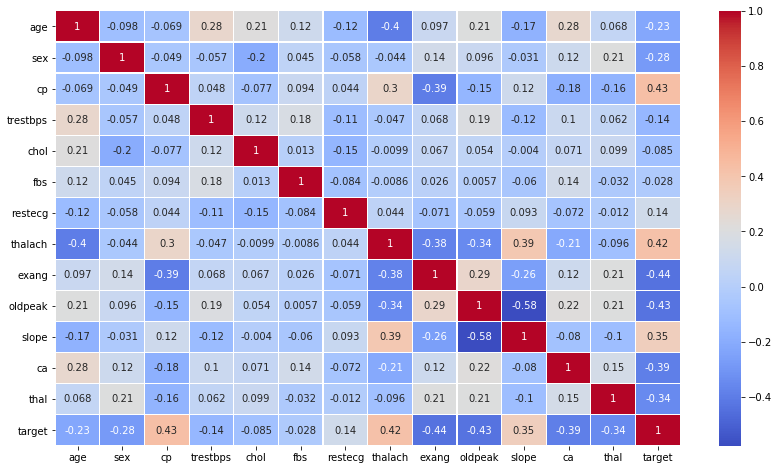

In [4]:


plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [5]:
X = df.drop(columns = ['fbs', 'chol'])


In [6]:
X=X.iloc[:,:-1]
y=df.iloc[:,-1]
X

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,0,150,0,2.3,0,0,1
1,37,1,2,130,1,187,0,3.5,0,0,2
2,41,0,1,130,0,172,0,1.4,2,0,2
3,56,1,1,120,1,178,0,0.8,2,0,2
4,57,0,0,120,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,1,123,1,0.2,1,0,3
299,45,1,3,110,1,132,0,1.2,1,0,3
300,68,1,0,144,1,141,0,3.4,1,2,3
301,57,1,0,130,1,115,1,1.2,1,1,3


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train


,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal
137,62,1,1,128,0,140,0,0.0,2,0,2
106,69,1,3,160,0,131,0,0.1,1,1,2
284,61,1,0,140,0,138,1,1.9,2,1,3
44,39,1,2,140,0,182,0,0.0,2,0,2
139,64,1,0,128,1,105,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,0,143,1,0.1,1,4,3
192,54,1,0,120,1,113,0,1.4,1,1,3
117,56,1,3,120,0,162,0,1.9,1,0,3
47,47,1,2,138,0,156,0,0.0,2,0,2


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [9]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier( random_state = 0, max_depth = 5, min_samples_leaf = 3)
model_tree.fit(X_train,y_train)
Y_tree = model_tree.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
print ("Accuracy score is " , accuracy_score(y_test,Y_tree)*100)

Accuracy score is  78.02197802197803


ValueError: x and y must be the same size

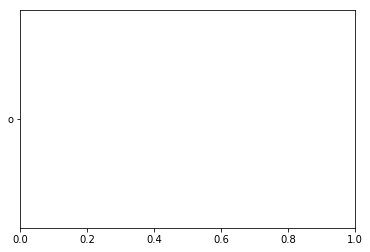

In [11]:
plt.scatter(y_test,'o',Y_tree,'_')

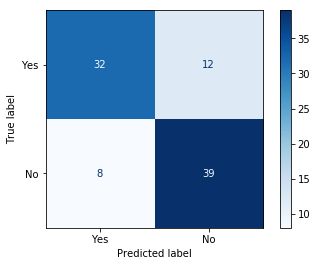

In [12]:
from sklearn.metrics import plot_confusion_matrix 

disp = plot_confusion_matrix(model_tree, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

In [13]:

from sklearn.ensemble import RandomForestClassifier
model_forset = RandomForestClassifier(n_estimators=125)
model_forset.fit(X_train,y_train)
Y_forset=model_forset.predict(X_test)


print ("Accuracy score is " , accuracy_score(y_test,Y_forset)*100)

Accuracy score is  82.41758241758241


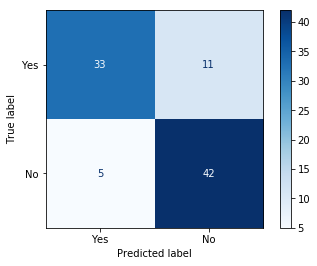

In [14]:


disp = plot_confusion_matrix(model_forset, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=7)
model_KNN.fit(X_train,y_train)
Y_KNN = model_KNN.predict(X_test)

In [16]:

print ("Accuracy score is " , accuracy_score(y_test,Y_KNN)*100)


Accuracy score is  81.31868131868131


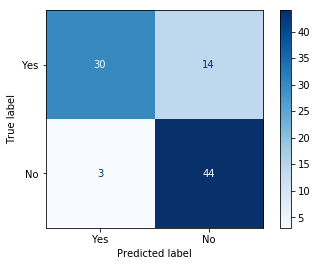

In [17]:
disp = plot_confusion_matrix(model_KNN, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

ValueError: x and y must be the same size

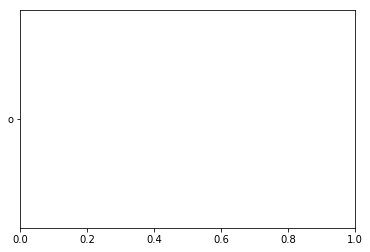

In [18]:
plt.scatter(y_test,'o',Y_KNN,'_')

In [19]:


from sklearn.svm import SVC
model_SVC=SVC(kernel='linear',C=5)
model_SVC.fit(X_train,y_train)
Y_SVC = model_SVC.predict(X_test)

In [20]:
print ("Accuracy score is " , accuracy_score(y_test,Y_SVC)*100)

Accuracy score is  81.31868131868131


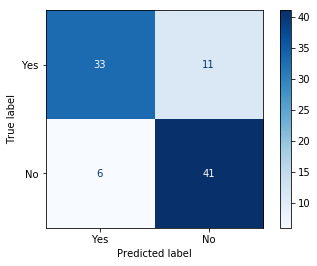

In [21]:
disp = plot_confusion_matrix(model_SVC, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
model_GBC = GradientBoostingClassifier(learning_rate=.4)
model_GBC.fit(X_train,y_train)
y_Gpred=model_GBC.predict(X_test)
print ("Accuracy score is " , accuracy_score(y_test,y_Gpred)*100)


Accuracy score is  81.31868131868131


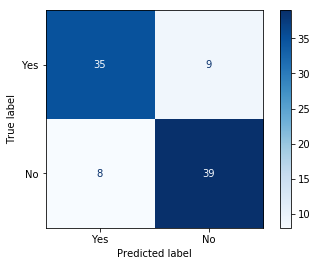

In [23]:
disp = plot_confusion_matrix(model_GBC, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

In [24]:
from catboost  import CatBoostClassifier
model_cat=CatBoostClassifier()
model_cat.fit(X_train,y_train)
Y_cat=model_cat.predict(X_test)

Learning rate set to 0.005312
0:	learn: 0.6895390	total: 53.5ms	remaining: 53.4s
1:	learn: 0.6854019	total: 54.4ms	remaining: 27.1s
2:	learn: 0.6812254	total: 55.2ms	remaining: 18.3s
3:	learn: 0.6783048	total: 55.9ms	remaining: 13.9s
4:	learn: 0.6745404	total: 56.7ms	remaining: 11.3s
5:	learn: 0.6706208	total: 57.4ms	remaining: 9.51s
6:	learn: 0.6667210	total: 58.1ms	remaining: 8.24s
7:	learn: 0.6624864	total: 58.8ms	remaining: 7.29s
8:	learn: 0.6587836	total: 59.5ms	remaining: 6.55s
9:	learn: 0.6556016	total: 60.3ms	remaining: 5.96s
10:	learn: 0.6522752	total: 61ms	remaining: 5.48s
11:	learn: 0.6487972	total: 61.7ms	remaining: 5.08s
12:	learn: 0.6451389	total: 62.4ms	remaining: 4.74s
13:	learn: 0.6409687	total: 63.1ms	remaining: 4.44s
14:	learn: 0.6375946	total: 63.8ms	remaining: 4.19s
15:	learn: 0.6340065	total: 64.6ms	remaining: 3.97s
16:	learn: 0.6299830	total: 65.3ms	remaining: 3.77s
17:	learn: 0.6269758	total: 66ms	remaining: 3.6s
18:	learn: 0.6240204	total: 66.8ms	remaining: 3.4

In [25]:
print ("Accuracy score is " , accuracy_score(y_test,Y_cat)*100)

Accuracy score is  80.21978021978022


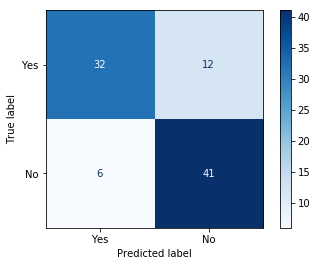

In [26]:
disp = plot_confusion_matrix(model_cat, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

In [27]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [28]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X_train,y_train)
y_GNB = model_GNB.predict(X_test)
print ("Accuracy score is " , accuracy_score(y_test,y_GNB)*100)

Accuracy score is  82.41758241758241
